<a href="https://colab.research.google.com/github/alefonsecabb/Machine_Learning_sklearn/blob/main/Machine_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

uri='https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'

dados = pd.read_csv(uri)

In [4]:
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [5]:
x = dados[['home', 'how_it_works', 'contact']]

In [6]:
y = dados['bought']

In [7]:
print(x.head())


   home  how_it_works  contact
0     1             1        0
1     1             1        0
2     1             1        0
3     1             1        0
4     1             1        0


In [8]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: bought, dtype: int64


In [9]:
mapa = {
    'home' : 'principal',
    'how_it_works' : 'como_funciona',
    'contact' : 'contato',
    'bought' : 'comprou'
}

dados = dados.rename(columns = mapa)

In [10]:
dados.head()

,principal,como_funciona,contato,comprou
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [11]:
dados.shape # full sample

(99, 4)

In [12]:
train_x = x[:75] # train on 75% of the sample
train_y = y[:75]

test_x = x[75:] # test on 25% of the sample
test_y = y[75:]
print('We´ll train on %d elements and test on %d elements' % (len(train_x), len(test_x)))

We´ll train on 75 elements and test on 24 elements


In [13]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy_score = (predictions == test_y).sum() / len(test_x)
print('The accuracy was %.2f%%' % (accuracy_score * 100))


The accuracy was 95.83%


- Now using library to split samples from tests

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20 # determine max random from train and test

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25)

model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy_score = (predictions == test_y).sum() / len(test_x)

print('We trained on %d elements and tested on %d elements' % (len(train_x), len(test_x)))
print('The accuracy was %.2f%%' % (accuracy_score * 100))



We trained on 74 elements and tested on 25 elements
The accuracy was 96.00%


In [15]:
train_y.value_counts()

,count
bought,
0,48
1,26


In [16]:
test_y.value_counts()

,count
bought,
0,18
1,7


In [17]:
# we have to fit the proportions using stratify

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20 # determine max random range from train and test

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy_score = (predictions == test_y).sum() / len(test_x)

print('We trained on %d elements and tested on %d elements' % (len(train_x), len(test_x)))
print('The accuracy was %.2f%%' % (accuracy_score * 100))

We trained on 74 elements and tested on 25 elements
The accuracy was 100.00%


In [18]:
train_y.value_counts()

,count
bought,
0,49
1,25


In [19]:
test_y.value_counts()

,count
bought,
0,17
1,8


# Second database for testing

In [20]:
import pandas as pd
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [21]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [22]:
finished_map = { # inverting the values of the unfinished column, creating a "finished column"
    0 : 1,
    1 : 0
}

dados['finished'] = dados.unfinished.map(finished_map)
dados.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [23]:
dados.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='expected_hours', ylabel='price'>

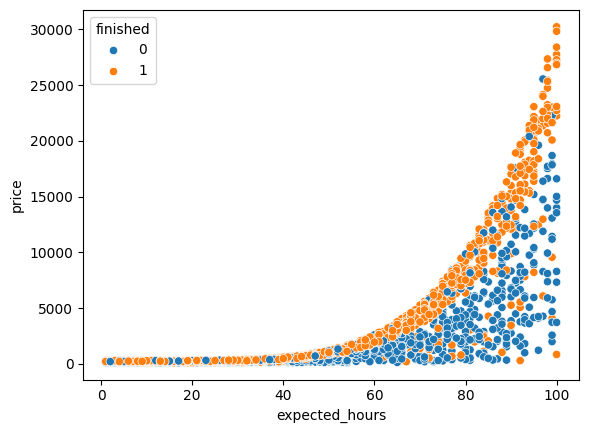

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = 'expected_hours', y = 'price', hue = 'finished', data = dados)

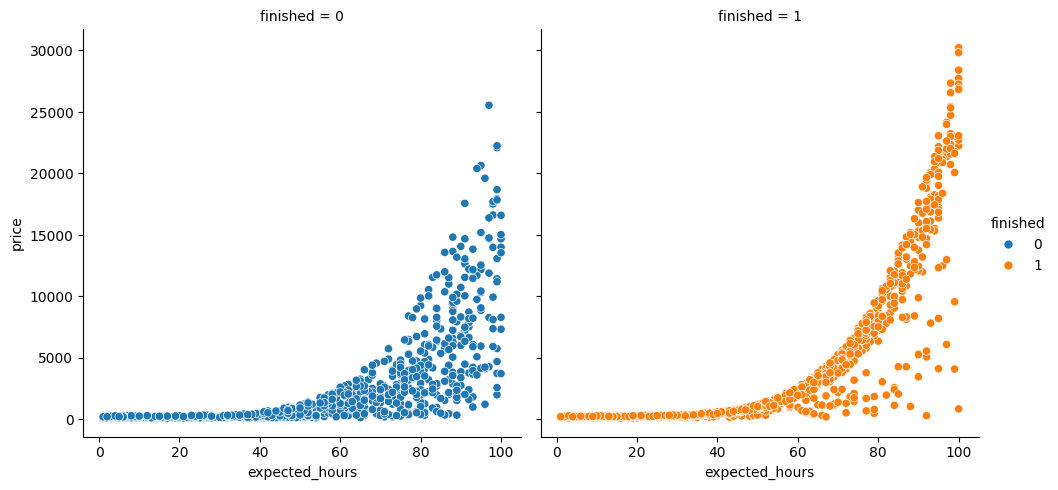

In [25]:
sns.relplot(x = 'expected_hours', y = 'price', hue = 'finished', col = 'finished', data = dados)

In [26]:
x = dados[['expected_hours', 'price']]
y = dados['finished']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20 # determine max random range from train and test

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy_score = (predictions == test_y).sum() / len(test_x)

print('We trained on %d elements and tested on %d elements' % (len(train_x), len(test_x)))
print('The accuracy was %.2f%%' % (accuracy_score * 100))

We trained on 1617 elements and tested on 540 elements
The accuracy was 57.22%


In [28]:
import numpy as np

comparative_prediction = np.ones(540)
accuracy_score = (comparative_prediction == test_y).sum() / len(test_y)

print('The accuracy of the baseline algoritm was %.2f%%' % (accuracy_score * 100))


The accuracy of the baseline algoritm was 52.59%


<Axes: xlabel='expected_hours', ylabel='price'>

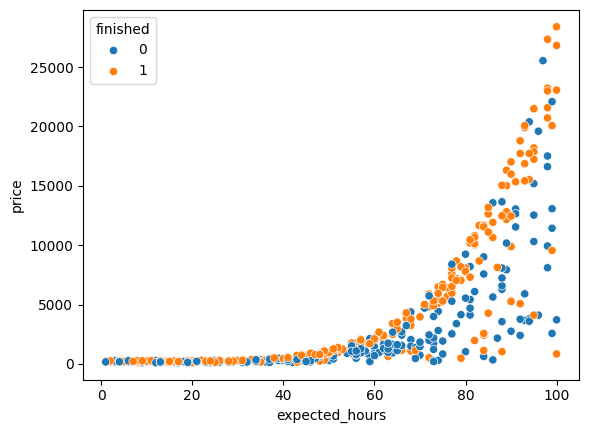

In [29]:
sns.scatterplot(x = 'expected_hours', y = 'price', hue = test_y, data = test_x)

In [30]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()

print(x_min, x_max, y_min, y_max)

1 100 101 28398


In [31]:
pixels = 100
ax_X = np.arange(x_min, x_max, (x_max - x_min) / pixels)
ax_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [32]:
xx, yy = np.meshgrid(ax_X, ax_y)
points = np.c_[xx.ravel(), yy.ravel()]
points

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.811503e+04],
       [9.802000e+01, 2.811503e+04],
       [9.901000e+01, 2.811503e+04]])

In [33]:
z = model.predict(points)
z = z.reshape(xx.shape)
z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

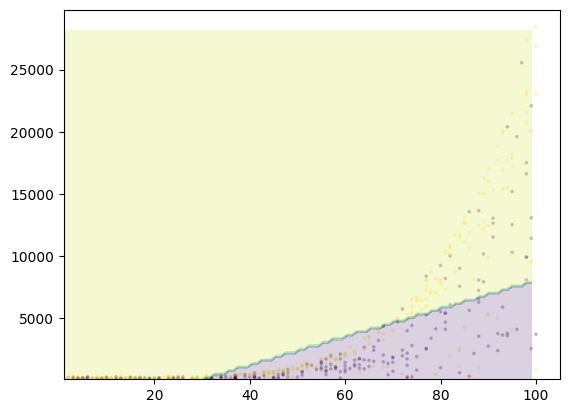

In [34]:
import matplotlib.pyplot as plt

plt.scatter(x = test_x.expected_hours, y = test_x.price, c = test_y, s=3, alpha = 0.2)
plt.contourf(xx, yy, z, alpha = 0.2) # Decision boundary

In [35]:
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(gamma='auto')

Treinaremos com 1617 elementos e testaremos com 540 elementos


# Another database for tests

In [41]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

In [42]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [38]:
Sold_change = {
    'yes' : 1,
    'no' : 0
}

dados['sold'] = dados.sold.map(Sold_change)

In [39]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [40]:
from datetime import datetime

actual_year = datetime.today().year
dados['model_age'] = actual_year - dados.model_year
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5 # determine max random range from train and test
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_train_x), len(raw_test_x)))

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy_score = (predictions == test_y).sum() / len(test_x)

print('We trained on %d elements and tested on %d elements' % (len(train_x), len(test_x)))
print('The accuracy was %.2f%%' % (accuracy_score * 100))

Treinaremos com 1617 elementos e testaremos com 540 elementos
We trained on 1617 elements and tested on 540 elements
The accuracy was 66.85%
